In [15]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from tabulate import tabulate
from tqdm import tqdm

In [16]:
df=pd.read_csv('dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,metal_amount_mmol,ligand_amount_mmol,reductant_amount_mmol,sol1_vol_mL,solv2_vol_mL,time_min,temp_c,7,8,9,10,11,size_nm,g_factor*10^4.1
0,0,0,0,-0.454943,-0.187770,-0.196938,-0.123491,-0.525157,0.680663,-0.997007,1.0,46.0,15.0,9.0,1.0,3.06,0.000000
1,1,1,1,-0.454943,-0.187770,-0.196938,-0.103038,-0.525157,0.680663,-0.997007,1.0,46.0,15.0,9.0,1.0,1.00,0.757989
2,2,2,2,1.601355,0.032059,0.273730,-0.174625,-0.525157,-0.593509,-0.997007,6.0,71.0,15.0,9.0,1.0,1.00,0.583069
3,3,3,3,1.768534,0.047047,0.285130,-0.031450,-0.525157,-0.593509,-0.997007,6.0,47.0,15.0,9.0,1.0,2.37,0.000000
4,4,4,4,-0.454943,-0.187770,-0.196938,-0.123491,-0.525157,0.680663,-0.997007,1.0,71.0,15.0,9.0,1.0,4.00,1.115760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-0.265474,-0.452514,-0.268570,-0.604149,-0.525157,0.217328,-0.176375,6.0,35.0,15.0,9.0,1.0,50.00,2.000000
197,197,197,197,0.570420,-0.202758,0.002838,-0.174625,-0.006407,-0.535592,-0.176375,6.0,79.0,15.0,9.0,4.0,1.05,15.000000
198,198,198,198,0.570420,-0.202758,0.002838,-0.174625,-0.006407,-0.535592,-0.176375,6.0,79.0,15.0,9.0,4.0,1.30,10.000000
199,199,199,199,0.570420,-0.327661,0.002838,-0.174625,-0.006407,-0.535592,-0.176375,6.0,79.0,15.0,9.0,4.0,1.05,7.000000


In [17]:
input_col=[col for col in df.columns]
input_col.remove('Unnamed: 0')
input_col.remove('Unnamed: 0.1')
input_col.remove('Unnamed: 0.2')
input_col.remove('g_factor*10^4.1')
input_col

['metal_amount_mmol',
 'ligand_amount_mmol',
 'reductant_amount_mmol',
 'sol1_vol_mL',
 'solv2_vol_mL',
 'time_min',
 'temp_c',
 '7',
 '8',
 '9',
 '10',
 '11',
 'size_nm']

In [18]:
#individual output:

X = df[input_col]

Y = df['g_factor*10^4.1']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)


## Optimizing size model


### 1. Extra Trees

In [19]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 13):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))
            ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
            ET_r2 = r2_score(Y_test, ET_Y_pred)
            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [03:08<00:00,  7.85s/it]

0.7392492863411535 1 1 26


In [32]:

# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = ET_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['AB_Y_pred'] = ET_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Extra_Tree_predictions.csv', index=False)
print("预测结果已保存到 Extra_Tree_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Extra_Tree'],
    'MAE': [ET_mae],
    'R2': [ET_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Extra_Tree_performance.csv', index=False)
print("性能指标已保存到 Extra_Tree_performance.csv")

预测结果已保存到 Extra_Tree_predictions.csv
性能指标已保存到 Extra_Tree_performance.csv


### 2. Decision Tree

In [20]:
min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 13):
        for k in range(4, 60, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, np.ravel(Y_train))
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))
            DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
            DT_r2 = r2_score(Y_test, DT_Y_pred)
            
            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [01:14<00:00,  2.58s/it]

0.689053055739003 19 8 57


In [33]:

# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = DT_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = DT_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Decision_Tree_predictions.csv', index=False)
print("预测结果已保存到 Decision_Tree_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Decision_Tree'],
    'MAE': [DT_mae],
    'R2': [DT_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Decision_Tree_performance.csv', index=False)
print("性能指标已保存到 Decision_Tree_performance.csv")

预测结果已保存到 Decision_Tree_predictions.csv
性能指标已保存到 Decision_Tree_performance.csv


### 3. Random Forest

In [21]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 13, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))
            RF_mae = mean_absolute_error(Y_test, RF_Y_pred)
            RF_r2 = r2_score(Y_test, RF_Y_pred)
            
            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [03:21<00:00,  6.72s/it]

0.8946962965143745 14 4 5


In [34]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = RF_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = RF_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Random_Tree_predictions.csv', index=False)
print("预测结果已保存到 Random_Tree_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['RAndom_Tree'],
    'MAE': [RF_mae],
    'R2': [RF_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Random_Forest_performance.csv', index=False)
print("性能指标已保存到 Random_Forest_performance.csv")

预测结果已保存到 Random_Tree_predictions.csv
性能指标已保存到 Random_Forest_performance.csv


### 4. K Neighbors

In [22]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i,
                                      p=j).fit(X_train, np.ravel(Y_train))

        KNN_Y_pred = KNN_reg.predict(X_test)
        KNN_mae = mean_absolute_error(Y_test, KNN_Y_pred)
        KNN_r2 = r2_score(Y_test, KNN_Y_pred)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:06<00:00,  5.60it/s]

1.4307357836422288 1 1


In [35]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = KNN_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = KNN_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('K_Neighbors_predictions.csv', index=False)
print("预测结果已保存到K_Neighbors_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['K_Neighbors'],
    'MAE': [KNN_mae],
    'R2': [KNN_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('K_Neighbors_performance.csv', index=False)
print("性能指标已保存到 K_Neighbors_performance.csv")

预测结果已保存到K_Neighbors_predictions.csv
性能指标已保存到 K_Neighbors_performance.csv


### 5.Bagging

In [23]:
min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 20)):
    for j in range(1, 20):
        for k in range(2, 36, 2):

            B_regr = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)

            B_regr.fit(X_train, np.ravel(Y_train))

            B_Y_pred = B_regr.predict(X_test)
            B_mae = mean_absolute_error(Y_test, B_Y_pred)
            B_r2 = r2_score(Y_test, B_Y_pred)

            mae = mean_absolute_error(Y_test, B_Y_pred)

            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k

print(min_mae, min_i, min_j, min_k)

100%|██████████| 19/19 [02:03<00:00,  6.49s/it]

1.0922364834264982 15 13 20


In [36]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = B_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = B_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Bagging_predictions.csv', index=False)
print("预测结果已保存到Bagging_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Bagging'],
    'MAE': [B_mae],
    'R2': [B_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Bagging_performance.csv', index=False)
print("性能指标已保存到 Bagging_performance.csv")

预测结果已保存到Bagging_predictions.csv
性能指标已保存到 Bagging_performance.csv


### 6.AdaBoosting

In [24]:
min_mae = 99999
min_i, min_j = 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        AB_regr = AdaBoostRegressor(n_estimators=i, loss='exponential', learning_rate=j)
        AB_regr.fit(X_train, np.ravel(Y_train))
        AB_Y_pred = AB_regr.predict(X_test)
        AB_mae = mean_absolute_error(Y_test, AB_Y_pred)
        AB_r2 = r2_score(Y_test, AB_Y_pred)

        if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
print(min_mae, min_i, min_j)

100%|██████████| 29/29 [00:18<00:00,  1.55it/s]

1.4989992018385143 1 1


In [37]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = AB_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = AB_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('AdaBoosting_predictions.csv', index=False)
print("预测结果已保存到AdaBoosting_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['AdaBoosting'],
    'MAE': [AB_mae],
    'R2': [AB_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('AdaBoosting_performance.csv', index=False)
print("性能指标已保存到AdaBoosting_performance.csv")

预测结果已保存到AdaBoosting_predictions.csv
性能指标已保存到AdaBoosting_performance.csv



### 7.Gradient Boosting

In [25]:
# '''
# min_mae = 999
# min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
# for i in tqdm(range(300, 450, 10)):
#     for j in range(2, 30, 2):
#         for k in np.arange(0.06, 0.22, 0.02):
#             for l in range(2, 22, 2):
#                 GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
#                 GB_regr.fit(X_train, np.ravel(Y_train))
#                 GB_Y_pred = GB_regr.predict(X_test)

#                 mae = mean_absolute_error(Y_test, GB_Y_pred)
#                 if (min_mae > mae):
#                     min_mae = mae
#                     min_i = i
#                     min_j = j
#                     min_k = k
#                     min_l = l

# print(min_mae, min_i, min_j, min_k, min_l)
# '''

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

param_dist = {
    'n_estimators': range(300, 450, 10),
    'max_depth': range(2, 30, 2),
    'learning_rate': np.arange(0.06, 0.22, 0.02),
    'random_state': range(2, 22, 2)
}

GB_regr = GradientBoostingRegressor()

random_search = RandomizedSearchCV(
    GB_regr, 
    param_distributions=param_dist,
    n_iter=50,  # 随机尝试50组参数，远少于完整搜索
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,  # 使用所有CPU核心并行计算
    random_state=42
)

random_search.fit(X_train, np.ravel(Y_train))

# print("最佳参数:", random_search.best_params_)
# print("最佳MAE:", -random_search.best_score_)

# 使用最佳模型预测
best_GB = random_search.best_estimator_
GB_Y_pred = best_GB.predict(X_test)
GB_mae = mean_absolute_error(Y_test, GB_Y_pred)
GB_r2 = r2_score(Y_test, GB_Y_pred)
print("最佳模型MAE:", GB_mae)
print("最佳模型R2:", GB_r2)


最佳模型MAE: 1.2060879337001151
最佳模型R2: 0.6539769212396978


In [38]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = GB_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = GB_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Gradient Boosting_predictions.csv', index=False)
print("预测结果已保存到Gradient Boosting_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Gradient Boosting'],
    'MAE': [GB_mae],
    'R2': [GB_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Gradient Boosting_performance.csv', index=False)
print("性能指标已保存到Gradient Boostingg_performance.csv")

预测结果已保存到Gradient Boosting_predictions.csv
性能指标已保存到Gradient Boostingg_performance.csv


### 8.Lasso

In [27]:
L_regr = Lasso(alpha=1, random_state=1)
L_regr.fit(X_train, np.ravel(Y_train))
L_Y_pred = L_regr.predict(X_test)

mae = mean_absolute_error(Y_test, L_Y_pred)
r_2 = r2_score(Y_test, L_Y_pred)
mse = mean_squared_error(Y_test, L_Y_pred)
# rmse = mean_squared_error(Y_test, L_Y_pred, squared=False)
L_mae = mean_absolute_error(Y_test, L_Y_pred)
L_r2 = r2_score(Y_test, L_Y_pred)
# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", L_r2, L_mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))


Outputs            R2    Mean absolute error    Mean squared error
---------  ----------  ---------------------  --------------------
g_factor   -0.0477402                2.99563               13.1815


In [39]:
# 将X_test和预测结果合并为DataFrame
# 假设X_test是DataFrame
if isinstance(X_test, pd.DataFrame):
    results_df = X_test.copy()
    results_df['Y_pred'] = L_Y_pred
    results_df['Y_test'] = Y_test  # 如果需要保存真实值
else:
    # 如果X_test是numpy数组
    results_df = pd.DataFrame(X_test)
    # 给特征列命名
    results_df.columns = [f'feature_{i}' for i in range(X_test.shape[1])]
    results_df['Y_pred'] = L_Y_pred
    results_df['Y_test'] = Y_test

# 保存到CSV
results_df.to_csv('Lasso_predictions.csv', index=False)
print("预测结果已保存到Lasso_predictions.csv")

# 保存性能指标
performance_metrics = {
    'Model': ['Lasso'],
    'MAE': [L_mae],
    'R2': [L_r2],
    'MSE': [mse]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df.to_csv('Lasso_performance.csv', index=False)
print("性能指标已保存到Lasso_performance.csv")

预测结果已保存到Lasso_predictions.csv
性能指标已保存到Lasso_performance.csv


### Saving Best model

In [28]:
DT_regr = DecisionTreeRegressor(max_depth=19,
                                max_features=8,
                                random_state=57)

DT_regr.fit(X_train, np.ravel(Y_train))
DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))
joblib.dump(DT_regr, "./model_SO_DecisionTree.joblib")

['./model_SO_DecisionTree.joblib']

## Analyzing

In [29]:
DT_regr = DecisionTreeRegressor(max_depth=19,
                                max_features=8,
                                random_state=57)

DT_regr.fit(X_train, np.ravel(Y_train))
DT_Y_pred = DT_regr.predict(X_test)

mae = mean_absolute_error(Y_test, DT_Y_pred)
r_2 = r2_score(Y_test, DT_Y_pred)
mse = mean_squared_error(Y_test, DT_Y_pred)
# rmse = mean_squared_error(Y_test, DT_Y_pred, squared=False)

# d = [ ["g_factor", r_2, mae, mse, rmse]]
d = [ ["g_factor", r_2, mae, mse]]
print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error"]))


Outputs          R2    Mean absolute error    Mean squared error
---------  --------  ---------------------  --------------------
g_factor   0.789665               0.689053                2.6462


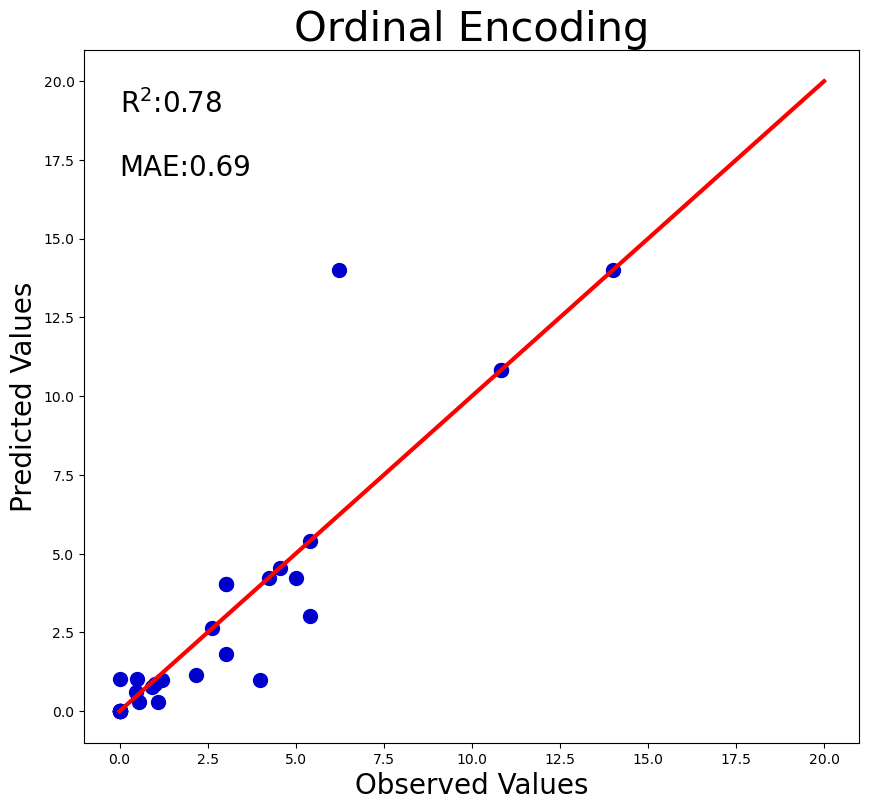

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))

fontsize=20
x1,y1=0,19
x2,y2=0,17

ax.plot(Y_test,DT_Y_pred ,'o',color='mediumblue',markersize=10)
ax.plot([0,20],[0,20], color = 'red',linewidth=3)
ax.set_title('Ordinal Encoding',fontsize=30)
ax.set_xlabel('Observed Values',fontsize=fontsize)
ax.set_ylabel('Predicted Values',fontsize=fontsize)
ax.text(x1,y1,"R$^{2}$:0.78",fontsize=fontsize)
ax.text(x2,y2,"MAE:0.69",fontsize=fontsize)
fig.savefig('Ordinal.svg',format='svg',dpi=300)

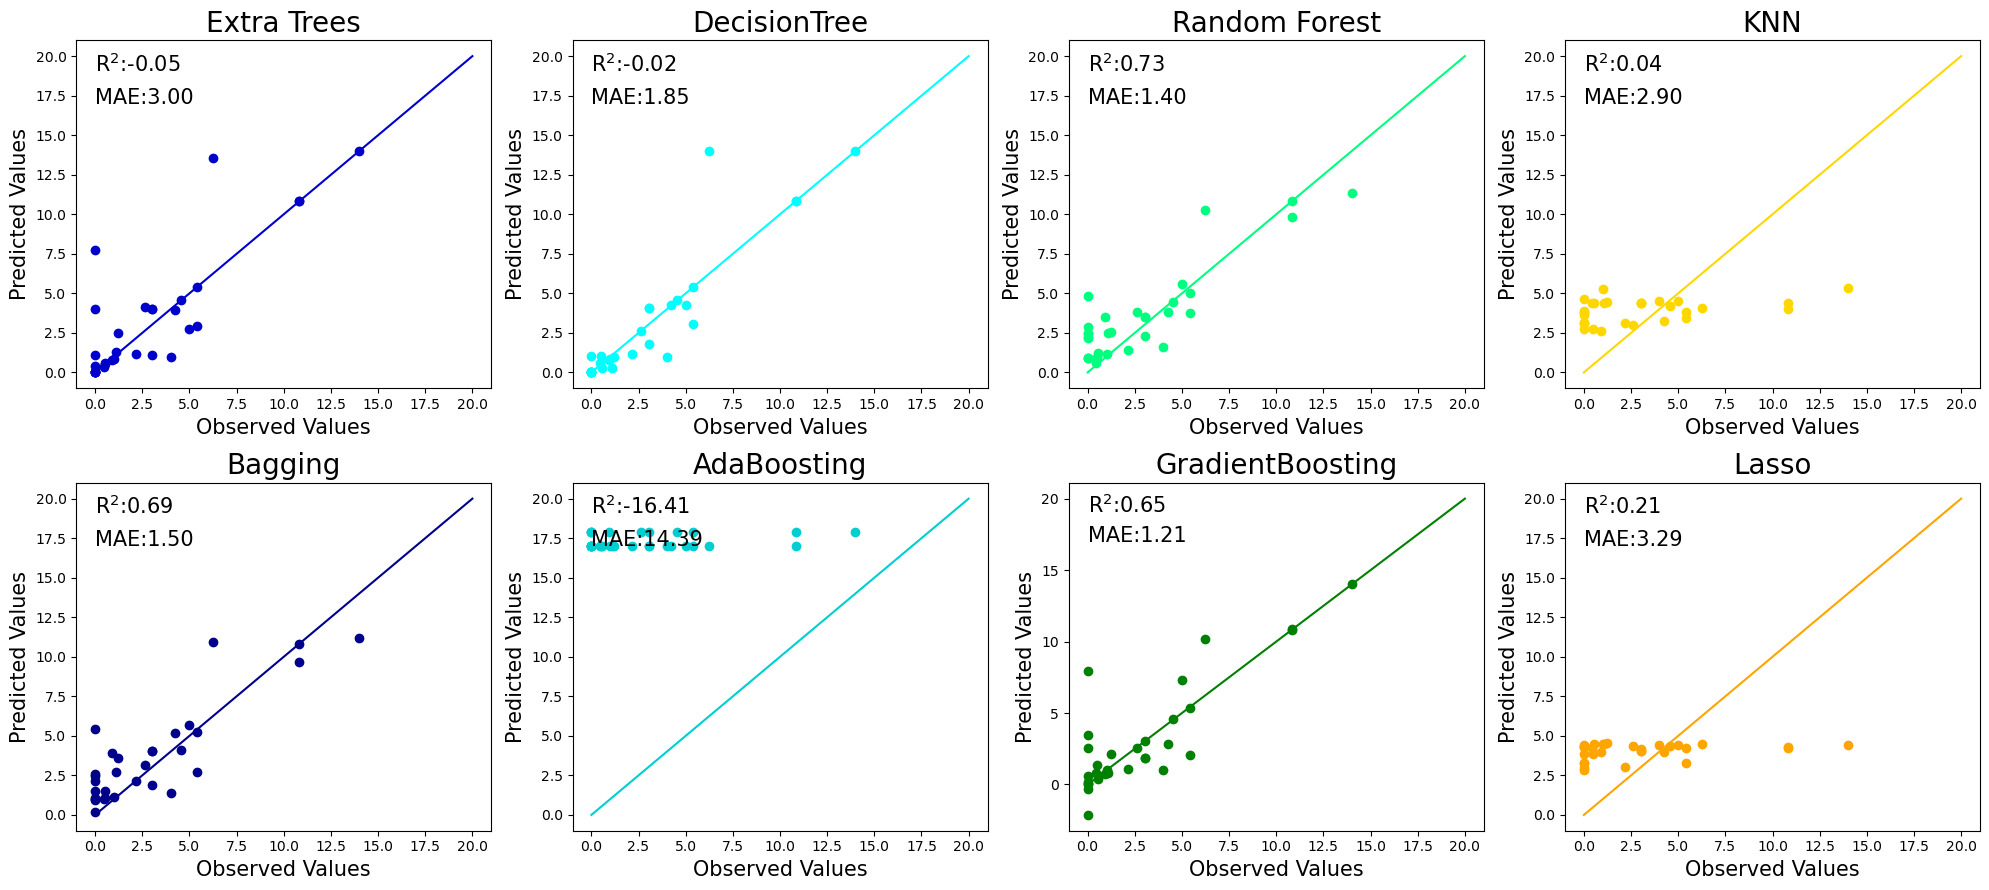

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20,9))

fontsize=15
x1,y1=0,19
x2,y2=0,17

ax[0,0].plot(Y_test,ET_Y_pred ,'o',color='mediumblue')
ax[0,0].plot([0,20],[0,20], color = 'mediumblue')
ax[0,0].set_title('Extra Trees',fontsize=20)
ax[0,0].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,0].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,0].text(x1,y1,"R$^{2}$:%.2f"%L_r2,fontsize=fontsize)
ax[0,0].text(x2,y2,"MAE:%.2f"%L_mae,fontsize=fontsize)

ax[0,1].plot(Y_test,DT_Y_pred ,'o',color='aqua')
ax[0,1].plot([0,20],[0,20], color = 'aqua')
ax[0,1].set_title('DecisionTree',fontsize=20)
ax[0,1].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,1].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,1].text(x1,y1,"R$^{2}$:%.2f"%DT_r2,fontsize=fontsize)
ax[0,1].text(x2,y2,"MAE:%.2f"%DT_mae,fontsize=fontsize)

ax[0,2].plot(Y_test,RF_Y_pred ,'o',color='springgreen')
ax[0,2].plot([0,20],[0,20], color = 'springgreen')
ax[0,2].set_title('Random Forest',fontsize=20)
ax[0,2].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,2].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,2].text(x1,y1,"R$^{2}$:%.2f"%RF_r2,fontsize=fontsize)
ax[0,2].text(x2,y2,"MAE:%.2f"%RF_mae,fontsize=fontsize)

ax[0,3].plot(Y_test,KNN_Y_pred ,'o',color='gold')
ax[0,3].plot([0,20],[0,20], color = 'gold')
ax[0,3].set_title('KNN',fontsize=20)
ax[0,3].set_xlabel('Observed Values',fontsize=fontsize)
ax[0,3].set_ylabel('Predicted Values',fontsize=fontsize)
ax[0,3].text(x1,y1,"R$^{2}$:%.2f"%KNN_r2,fontsize=fontsize)
ax[0,3].text(x2,y2,"MAE:%.2f"%KNN_mae,fontsize=fontsize)

ax[1,0].plot(Y_test,B_Y_pred ,'o',color='darkblue')
ax[1,0].plot([0,20],[0,20], color = 'darkblue')
ax[1,0].set_title('Bagging',fontsize=20)
ax[1,0].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,0].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,0].text(x1,y1,"R$^{2}$:%.2f"%B_r2,fontsize=fontsize)
ax[1,0].text(x2,y2,"MAE:%.2f"%B_mae,fontsize=fontsize)

ax[1,1].plot(Y_test,AB_Y_pred ,'o',color='darkturquoise')
ax[1,1].plot([0,20],[0,20], color = 'darkturquoise')
ax[1,1].set_title('AdaBoosting',fontsize=20)
ax[1,1].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,1].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,1].text(x1,y1,"R$^{2}$:%.2f"%AB_r2,fontsize=fontsize)
ax[1,1].text(x2,y2,"MAE:%.2f"%AB_mae,fontsize=fontsize)

ax[1,2].plot(Y_test,GB_Y_pred ,'o',color='green')
ax[1,2].plot([0,20],[0,20], color = 'green')
ax[1,2].set_title('GradientBoosting',fontsize=20)
ax[1,2].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,2].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,2].text(x1,y1,"R$^{2}$:%.2f"%GB_r2,fontsize=fontsize)
ax[1,2].text(x2,y2,"MAE:%.2f"%GB_mae,fontsize=fontsize)

ax[1,3].plot(Y_test,L_Y_pred ,'o',color='orange')
ax[1,3].plot([0,20],[0,20], color = 'orange')
ax[1,3].set_title('Lasso',fontsize=20)
ax[1,3].set_xlabel('Observed Values',fontsize=fontsize)
ax[1,3].set_ylabel('Predicted Values',fontsize=fontsize)
ax[1,3].text(x1,y1,"R$^{2}$:0.21",fontsize=fontsize)
ax[1,3].text(x2,y2,"MAE:3.29",fontsize=fontsize)

fig.tight_layout()
fig.savefig('ML_model.svg',format='svg',dpi=300)